<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA2 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

in this notebook we are to learn about Naïve bayes and how we can use it to classify.

In [4]:
import pickle

file = open("./assets/data.pkl", "rb")
data = pickle.load(file)
# print(data)
label = open("./assets/label.pkl", "rb")
label = pickle.load(label)
print(label)


[6, 5, 0, 2, 7, 0, 7, 5, 0, 7, 0, 6, 3, 6, 5, 5, 3, 3, 2, 9, 6, 3, 4, 4, 0, 7, 2, 7, 8, 6, 0, 9, 8, 3, 2, 9, 4, 8, 8, 5, 4, 0, 3, 3, 3, 2, 0, 8, 6, 0, 7, 5, 3, 5, 9, 2, 5, 3, 4, 9, 7, 9, 1, 9, 9, 7, 1, 3, 4, 7, 8, 1, 4, 0, 4, 1, 1, 8, 1, 8, 2, 6, 2, 8, 0, 5, 9, 5, 7, 6, 3, 4, 6, 5, 5, 9, 6, 2, 0, 9, 1, 2, 3, 2, 5, 8, 7, 4, 4, 8, 7, 9, 9, 5, 7, 6, 9, 2, 9, 5, 7, 2, 5, 9, 5, 8, 4, 3, 2, 2, 2, 8, 0, 3, 0, 6, 0, 9, 4, 0, 8, 6, 6, 7, 8, 1, 7, 8, 1, 0, 2, 8, 9, 9, 4, 1, 6, 9, 0, 2, 6, 1, 9, 2, 0, 3, 0, 5, 3, 8, 9, 8, 5, 5, 6, 1, 8, 6, 7, 3, 1, 6, 9, 4, 3, 5, 1, 0, 3, 6, 3, 0, 2, 7, 9, 3, 4, 0, 5, 8, 1, 9, 4, 8, 9, 8, 0, 5, 2, 7, 6, 2, 2, 1, 3, 2, 5, 3, 0, 0, 5, 3, 1, 4, 1, 0, 7, 2, 1, 2, 8, 5, 5, 9, 6, 9, 0, 8, 7, 4, 2, 0, 2, 9, 7, 2, 0, 2, 6, 7, 6, 5, 0, 1, 8, 5, 8, 0, 1, 8, 0, 4, 1, 2, 9, 8, 7, 4, 9, 6, 6, 4, 9, 8, 1, 5, 7, 1, 6, 0, 3, 9, 4, 8, 4, 8, 7, 9, 8, 7, 9, 3, 2, 1, 9, 8, 2, 2, 5, 6, 4, 9, 6, 4, 2, 1, 8, 8, 4, 5, 9, 6, 3, 4, 9, 0, 2, 8, 1, 8, 3, 2, 1, 8, 2, 6, 0, 3, 9, 1, 4, 2, 1, 

Digit (Individual Class) Accuracy of the Samples:
  Digit  Digit Accuracy
0     0        0.920570
1     1        0.953139
2     2        0.753410
3     3        0.835989
4     4        0.938285
5     5        0.629032
6     6        0.937500
7     7        0.853194
8     8        0.721328
9     9        0.881148
Overall Accuracy of Naive Bayes Model: 0.8085


Text(195.72222222222223, 0.5, 'Predicted class value')

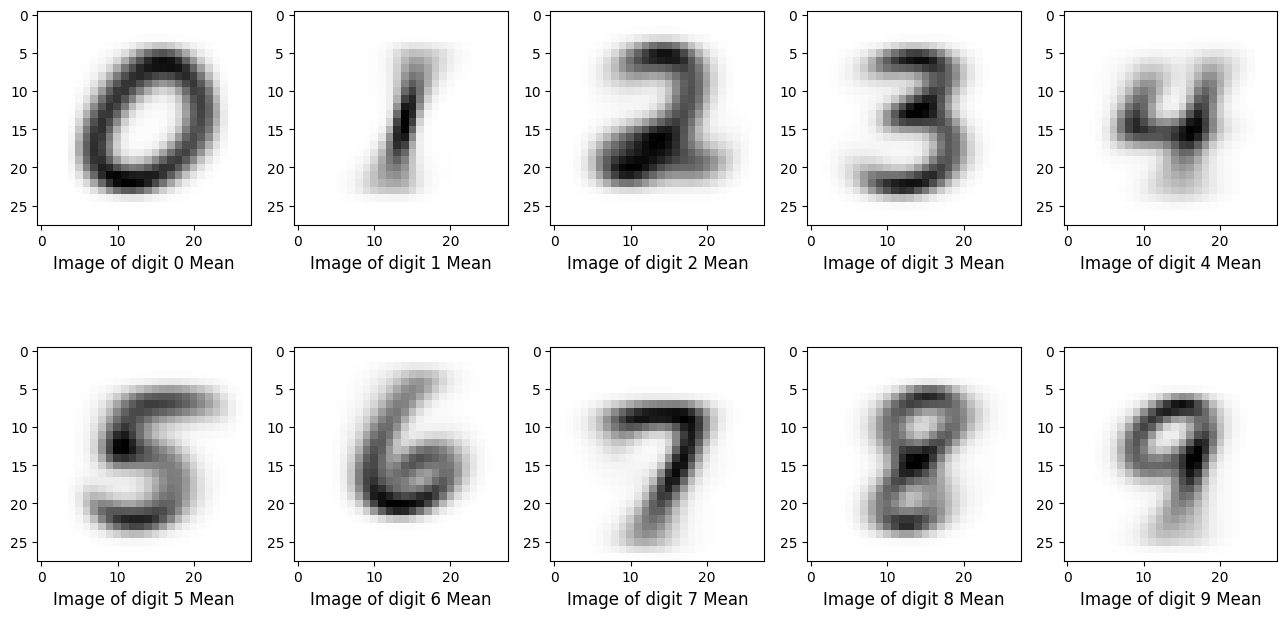

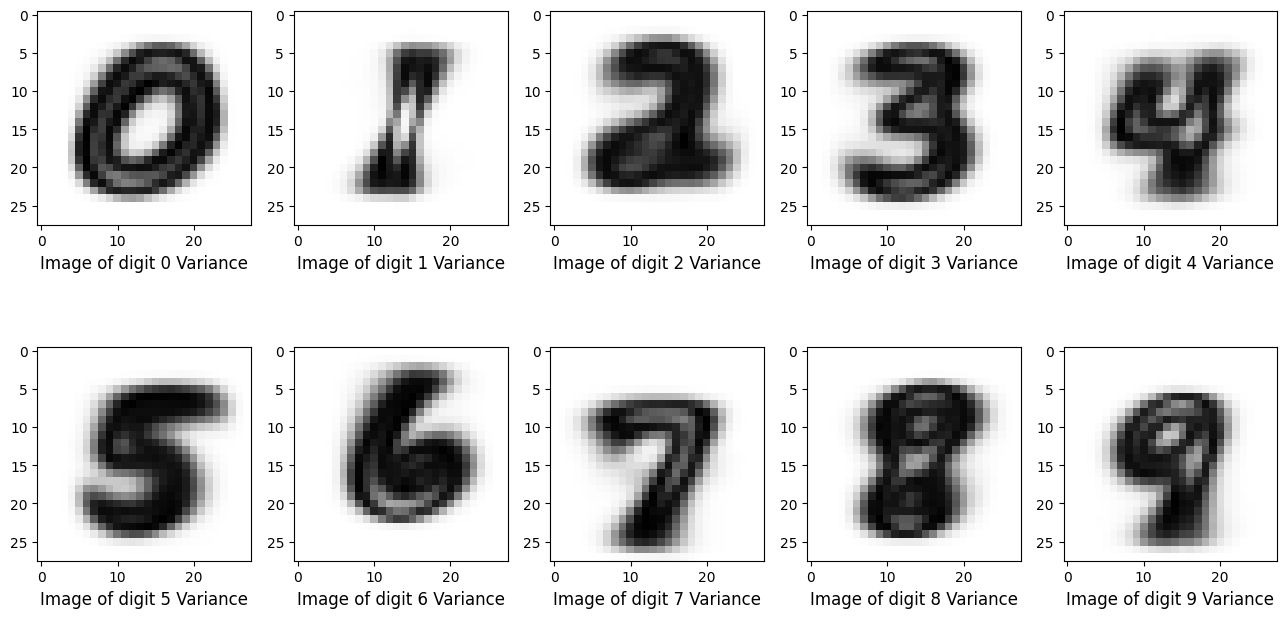

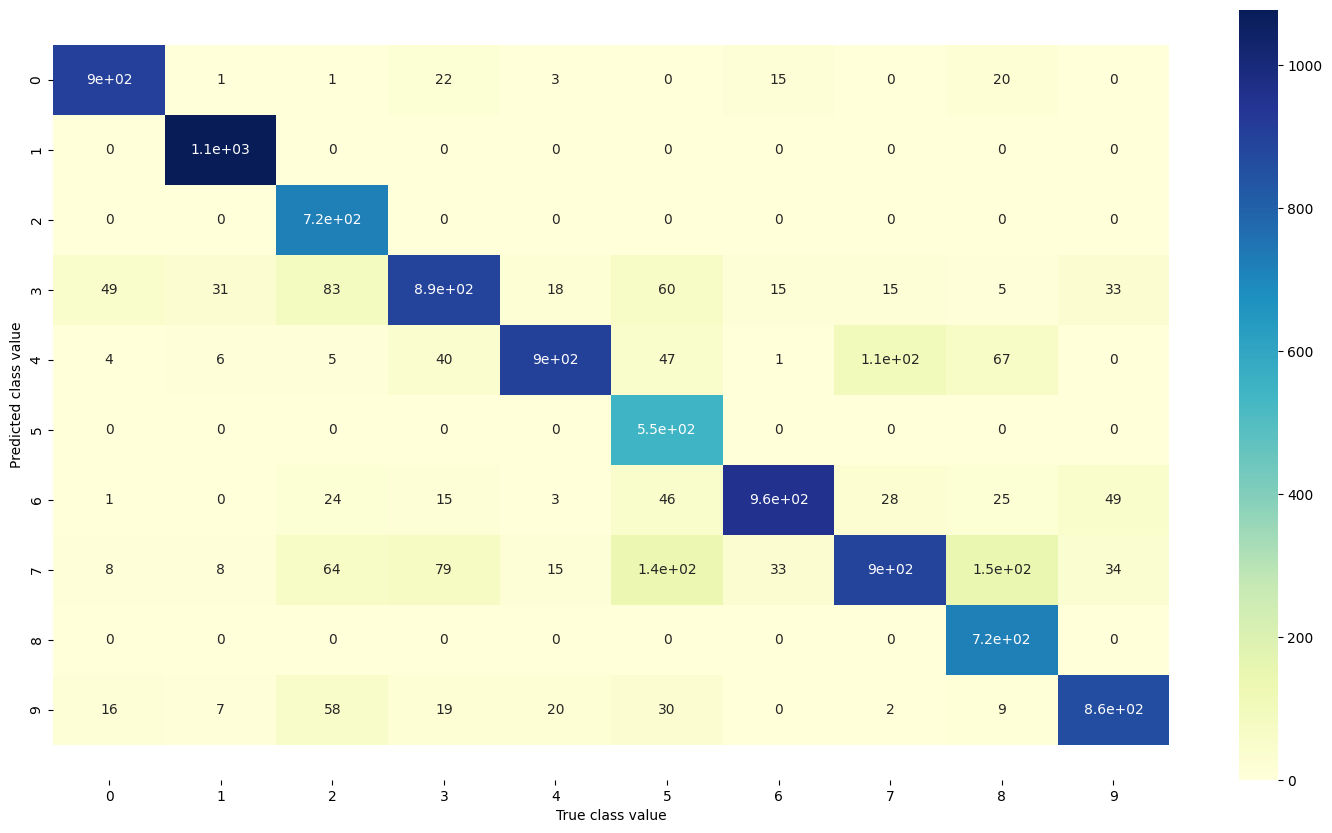

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
data = np.zeros([70000, 784])
data[:60000, :] = x_train
data[60000:, :] = x_test
label = np.zeros(70000)
label[:60000] = y_train
label[60000:] = y_test


def naive_bayes(data, label):
    n_s, n_f = data.shape  # Find the Shape (Samples,Features) of the data
    classes = np.unique(label)  # Find the Unique Classes in the Data
    n_c = len(classes)  # Number of Classes in the Data
    total_data = np.zeros([n_s, n_f + 1])  # Create a Zero Matrix with (Samples,Feature+1) dimensions
    total_data[:, :-1] = data  # Save the samples & features in the total_data matrix
    total_data[:, -1] = label  # Save the Labels in the total_data matrix
    np.random.shuffle(total_data)  # Shuffle the total_data Matrix (Sample & Label) are sampled together
    trainX = total_data[:60000, :]  # Train Data is taken from total Data
    np.random.shuffle(trainX)  # Train Data is shuffled once again
    testX = total_data[60000:, :]  # Test Data is taken from Total Data
    np.random.shuffle(testX)  # Test Data is shuffled once again
    testX_c = testX[:, :-1]  # Take the samples and feature from Test Data
    testX_l = testX[:, -1]  # Take the labels from Test Data
    mean_v = np.zeros([n_c, n_f])  # Take a Zero Matrix that will be used to store the mean of Features wrt classes
    var_v = np.zeros([n_c, n_f])  # Take a Zero Matrix that will be used to store the variance of Features wrt classes
    c_prob = []  # list to store P(class)
    confusion_matrix = np.zeros([n_c, n_c])  # Take a Zero Matrix for Confusion MAtrix of size (classes*classes)
    d_acc = []  # Take a list that will save each class(digit) accuracy

    for c in classes:
        trainX_c = trainX[trainX[:, -1] == c]  # Filter samples for each class
        trainX_c = trainX_c[:, :-1]  #
        c_prob.append(len(trainX_c) / len(trainX))
        mean_v[int(c), :] = trainX_c.mean(axis=0)  # Find mean of each class & save in corresonding mean matrix
        var_v[int(c), :] = trainX_c.var(axis=0)  # Find variance of each class & save in corresonding mean matrix

    var_v = (var_v + 1000)  # Since variance is 0 for many pixels, we need to add some value to the variance.
    # Adding 1000 gives one of the best accuracies
    count = 0

    for i in range(testX.shape[0]):
        lists = ([])  # Empty list to store probability of all class for ith sample feature
        for j in range(n_c):
            numerator = np.exp(-((testX_c[i] - mean_v[j]) ** 2) / (2 * var_v[j]))
            denominator = np.sqrt(2 * np.pi * (var_v[j]))
            prob_xc = numerator / denominator
            ratio = np.sum(np.log(prob_xc))  # Probability of jth class for ith feature
            # We found that all classes have equal counts and P(c) for all class is equal provides better accuracy.
            # The line below can be uncommented to use the original formula
            # ratio=np.sum(np.log(prob_xc)+np.log(c_prob[j]))
            lists.append(ratio)  # Append Probability of jth class for ith feature

        pred = lists.index(max(lists))  # Take y predicted for the classthat has the maximum probability for jth feature vector
        if pred == testX_l[i]:
            count = count + 1  # If y_predicted equals true y label,count is incremented
            confusion_matrix[int(testX_l[i])][int(testX_l[i])] = (confusion_matrix[int(testX_l[i])][int(testX_l[i])] + 1)
            # Values in corresponding confusion matrix is appended
        else:
            for k in range(n_c):
                if pred == k:
                    confusion_matrix[int(testX_l[k])][int(testX_l[i])] = (confusion_matrix[int(testX_l[k])][int(testX_l[i])] + 1)
                    # Values in corresponding confusion matrix is appended
    for l in classes:
        check = testX[testX[:, -1] == l]  # Filter features for each class
        a = (confusion_matrix[int(l)][int(l)]) / check.shape[0]  # Find accuracy of each digit
        d_acc.append(a)  # Append individual digit accuracy

    o_acc = count / testX.shape[0]  # Find overall Accuracy
    return (d_acc, o_acc, confusion_matrix, mean_v, var_v)
    # Return (Digit Accuracy,Overall Accuracy,Confusion Matrix,Mean & Variance)


# Call Naive Bayes Function
(digit_accuracy, overall_accuracy, matrix, mean_v, var_v) = naive_bayes(data, label)
# Print All class Accuracy
digit = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
naive_df = pd.DataFrame(list(zip(digit, digit_accuracy)), columns=["Digit", "Digit Accuracy"])
print("Digit (Individual Class) Accuracy of the Samples:")
print(naive_df)

# Print Overall Accuracy
print("Overall Accuracy of Naive Bayes Model: " + str(overall_accuracy))

#Print Mean of each Class in 28*28 Form
plt.figure(figsize=(16, 8))
for i in range(mean_v.shape[0]):
    plt.subplot(2, 5, i + 1)
    img = mean_v[i].reshape(28, 28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+ str(i) + ' Mean', fontsize = 12)
#Print Variance of each Class in 28*28 Form
plt.figure(figsize=(16,8))
for i in range(var_v.shape[0]):
    plt.subplot(2,5, i+1)
    img = var_v[i].reshape(28,28)
    plt.imshow(img, cmap="Greys")
    plt.xlabel('Image of digit '+ str(i) +' Variance', fontsize = 12)
    #Print Confusion Matrix
    
    
import seaborn as sns
plt.figure(figsize=(18,10))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('True class value')
plt.ylabel('Predicted class value')